In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

## 데이터 불러오기

In [302]:
subway2019 = pd.read_excel('./2019_1_to_8.xlsx', header = 1)
subway2020 = pd.read_csv('./2020_1_to_8.csv', encoding='cp949')

## 2019 승차인원 최상위 최하위

<BarContainer object of 5 artists>

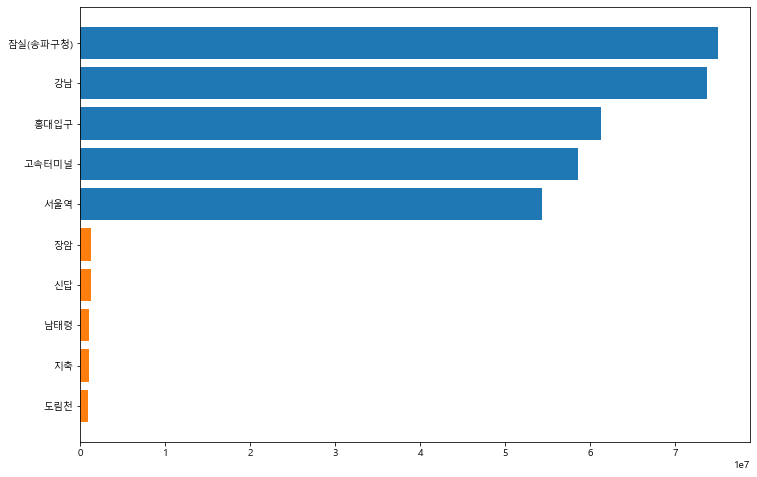

In [303]:
sum2019 = subway2019.iloc[:, [3, -1]].copy()
sum2019 = sum2019.groupby('역명', as_index=True).sum()
sum2019 = sum2019.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2019.head(5).index, sum2019.head(5)['합 계'])
plt.barh(sum2019.tail(5).index, sum2019.tail(5)['합 계'])

## 2020 승차인원 최상위 최하위

<BarContainer object of 5 artists>

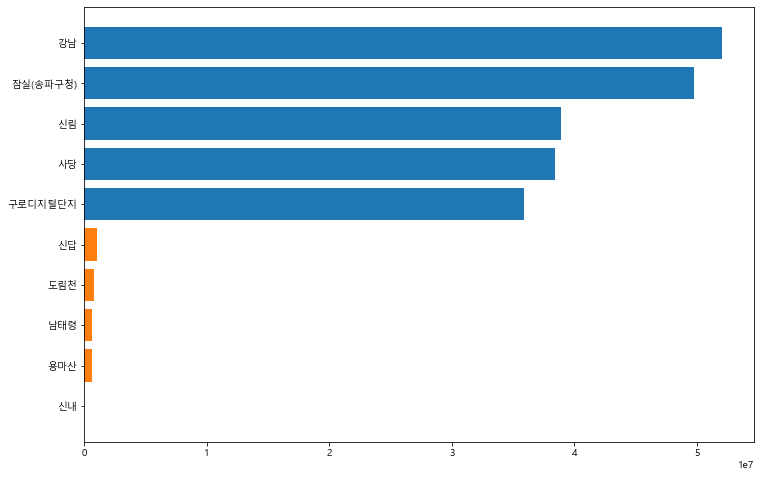

In [304]:
subway2020['합 계'] = subway2020.iloc[:, 5:].sum(axis=1)
sum2020 = subway2020.iloc[:, [3, -1]].copy()
sum2020 = sum2020.groupby('역명', as_index=True).sum()
sum2020 = sum2020.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2020.head(5).index, sum2020.head(5)['합 계'])
plt.barh(sum2020.tail(5).index, sum2020.tail(5)['합 계'])


## 2019-2020 승차인원 증감

<BarContainer object of 10 artists>

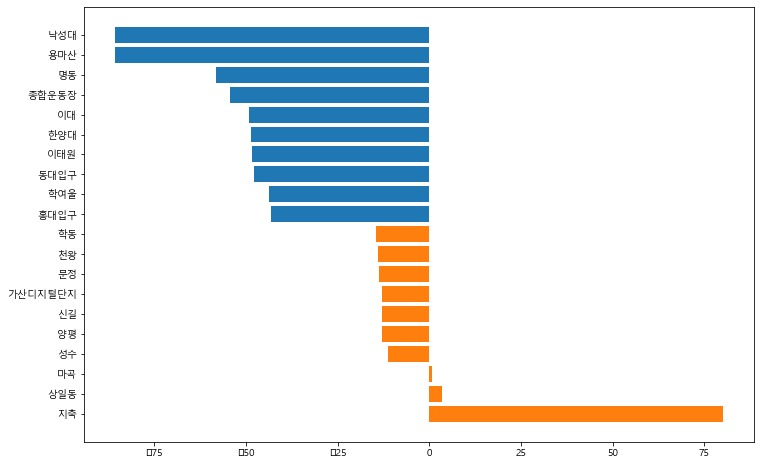

In [324]:
temp1 = subway2019.iloc[:, [3, -1]].copy()
temp1 = temp1.groupby('역명', as_index=False).sum()
temp2 = subway2020.iloc[:, [3, -1]].copy()
temp2 = temp2.groupby('역명', as_index=True).sum()
sumDiff = pd.merge(temp1, temp2, on='역명', how = 'inner')
sumDiff['증감'] = sumDiff.iloc[:, 2] - sumDiff.iloc[:, 1]
sumDiff['증감%'] = sumDiff['증감'] / sumDiff.iloc[:, 1] * 100
sumDiff = sumDiff.set_index('역명')
sumDiff = sumDiff.sort_values(by='증감%')
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sumDiff.head(10).index, sumDiff.head(10)['증감%'])
plt.barh(sumDiff.tail(10).index, sumDiff.tail(10)['증감%'])
